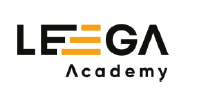

# **Contexto**



> ## Contexto Histórico


---


###  O *RMS Titanic*, um marco na engenharia naval do início do século XX, destinava-se a ser o navio de passageiros mais luxuoso e seguro da época. Em sua viagem inaugural de Southampton, Inglaterra, para Nova York, EUA, no dia 15 de Abril de 1912, o amplamente considerado **"inafundável"** colidiu com um *icebarg* levando a um dos desastres marítimos mais trágicos da história. Infelizmente, não havia barcos salva-vidas suficientes para todos a bordo, Destaque a magnitude do desastre: cerca de 2.224 pessoas a bordo e mais de 1.500 vidas perdidas. **A tragédia chocou o mundo pela perda massiva de vidas e pela falha em prever e evitar tal catástrofe.**


> ## Objetivos do Estudo
---
- ### A análise preditiva, realizada neste estudo, permite uma investigação detalhada de como variáveis como classe dos passageiros, sexo e idade podem ter influenciado as chances de sobrevivência dos passageiros. Essas análises fornecem não apenas um entendimento mais profundo do desastre, mas também lições valiosas sobre gestão de emergências, segurança de navios e desigualdades sociais.

- ### Embora houvesse algum elemento de sorte envolvido na sobrevivência, parece que alguns grupos de pessoas tinham mais probabilidades de sobreviver do que outros. Neste desafio, analisamos com base na matemática, estátistica e na estudo dos dados **"quais classes de pessoas tinham mais probabilidades de sobreviver"**, utilizando dados sobre os passageiros.

- ### Obtivemos previamente dados que incluem informações sobre passageiros como nome, idade, sexo, classe da acomodação, etc. O arquivo *Train.csv* contém os detalhes de um subconjunto dos passageiros a bordo (891 para ser exato) e, mais importante ainda, revelará se sobreviveram ou não, também conhecido como a "verdade em terra". O conjunto de dados *test.csv* contém informações semelhantes, mas não revela a "verdade em terra" para cada passageiro.

- ### Utilizando os padrões encontrados nos dados do *train.csv*,iremos ao longo desse código, analisar a situação dos outros 418 passageiros a bordo, descritos pela base de testes, e descobrir a chance de sua sobrevicência na tragédia

# Case Titanic

# Pré-processamento e análise inicial na base de Treinamento

> ## Imports e leitura dos dados
---
* ### **A fim de trabalhar com os dados é importante estar ciente, com antecedência, das dependências necessárias para realizar as analises sobre os dados. Para isso são importados algumas bibliotecas, tais como: pandas, numpy, seaborn e matplotlib**



* ### **Além disso, a fim de trabalhar com os dados fornecidos, treino e teste, é necessário carregá-los em memória a fim de podermos acessá-los e trabalhar em cima deles**

In [1]:
#imports das bibliotecas permitidas no curso
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
# Leitura dos dados no formato CSV
df = pd.read_csv('/content/drive/MyDrive/Leega_case_final/train.csv')

In [5]:
# Resumo estatístico do dataframe ignorando os NaNs
# Usamos para ter uma visão geral dos dados antes de tratá-los
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
# Apresenta uma amostra do dataframe
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


> ## Tratando Dados Ausentes
---
* ### **No contexto dos dados históricos do desastre do Titanic, observamos que a variável 'Idade' possui uma quantidade significativa de valores ausentes. A ausência de dados completos sobre a idade dos passageiros pode impactar a análise de sobrevivência, já que a idade pode ser um fator relevante para determinar as chances de sobreviver a tal evento. A escolha da mediana em detrimento da média é estrategicamente vantajosa, pois ela é menos sensível a valores extremos (outliers), fornecendo uma estimativa mais robusta para a idade central tendência da população em estudo. Entretanto, é importante mencionar que usamos estes valores apenas como "dummies" a fim de não prejudicar a estrutura dos nossos dados. Em uma situação mais profissional estes dados deveriam ser melhor tratados a fim de obter dados mais confiaveis**

-

* ### **Ao preencher os dados ausentes da idade com a mediana,podemos realizar análises mais precisas sobre como a idade afetou as taxas de sobrevivência no desastre do Titanic. Por exemplo, poderia ser descoberto que crianças e idosos tiveram taxas de sobrevivência mais altas ou mais baixas do que a população geral de passageiros, um detalhe que poderia ser perdido se os valores ausentes não fossem adequadamente tratados**

-

* ### **Ademais, notamos também que as colunas "embarked" e "cabin" possuiam valores nulos. Como sugerido, preenchemos estes valores com LNI** e CNI

In [7]:
# Contando o total de registros nulos
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
# Resumo estatístico do atributo idade
df.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [9]:
# Conta quantos passageiros em cada idade, e quantos têm a idade nula
df.groupby(['Age'],dropna=False)['PassengerId'].count().sort_values(ascending=False)

Age
NaN      177
24.00     30
22.00     27
18.00     26
30.00     25
        ... 
24.50      1
0.67       1
0.92       1
36.50      1
0.42       1
Name: PassengerId, Length: 89, dtype: int64

In [10]:
#Renomeia as colunas do dataframe
df.rename(columns={'PassengerId':'Id_passageiro', 'Pclass':'Classe',
                   'Survived': 'Sobreviveu','Name':'Nome', 'Sex':'Genero',
                   'Age':'Idade', 'SibSp':'numeroIrmaosConj', 'Parch':'numeroPaisEFilhos',
                   'Ticket':'Ticket', 'Fare':'Tarifa', 'Cabin':'Cabine',
                   'Embarked':'Porto'},inplace=True)

In [11]:
df['Porto'].fillna('LNI', inplace=True)
df['Cabine'].fillna('CNI', inplace=True)

# Calcula os valores da mediana das idades para cada gênero
md_idade_male = df[df['Genero'] == 'male']['Idade'].median()
md_idade_female = df[df['Genero'] == 'female']['Idade'].median()

# Arredonda as medianas com duas casas decimais de precisão
md_idade_male = round(md_idade_male, 2)
md_idade_female = round(md_idade_female, 2)

print(f"Mediana idade Homem: {md_idade_male}\nMediana idade mulher: {md_idade_female}")

df.loc[df['Genero'] == 'male', 'Idade'] = df.loc[df['Genero'] == 'male', 'Idade'].fillna(md_idade_male)
df.loc[df['Genero'] == 'female', 'Idade'] = df.loc[df['Genero'] == 'female', 'Idade'].fillna(md_idade_female)

Mediana idade Homem: 29.0
Mediana idade mulher: 27.0


In [12]:
# Visualização do dataframe após mudanças
df.head()

,Id_passageiro,Sobreviveu,Classe,Nome,Genero,Idade,numeroIrmaosConj,numeroPaisEFilhos,Ticket,Tarifa,Cabine,Porto
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,CNI,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,CNI,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,CNI,S


In [13]:
#Exibe as idades únicas dos passageiros
df['Idade'].unique()

array([22.  , 38.  , 26.  , 35.  , 29.  , 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  , 16.  ,
       25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  , 71.  ,
       37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 , 51.  ,
       55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  , 45.5 ,
       20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  , 60.  ,
       10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  , 70.  ,
       24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

> ## Transformação de Dados Categóricos

---

## Quando trabalhamos com dados a conversão de valores categóricos em valores numéricos é um passo comum na preparação de dados para análise estatística. No trecho abaixo, diferentes características categóricas são mapeadas para representações numéricas ou nominais mais descritivas, o que é fundamental para simplificar a análise e facilitar a interpretação dos resultados.

-

* ### **Mapa dos Portos**: Os valores categóricos dos portos de embarque (C = Cherbourg, Q = Queenstown, S = Southampton) são convertidos em um formato numérico (1, 2, 3) por meio de um dicionário de mapeamento. Essa conversão permite Transformar essas categorias em números permite que análises como regressão, clusterização e outras possam ser aplicadas e utilizem essa informação sem ambiguidades.

-

* ### **Mapa de Gêneros**: De forma semelhante, os gêneros ('male' e 'female') são mapeados para valores numéricos (1 e 2). Isso não apenas simplifica a representação dos dados, mas também preserva a distinção númerica entre os gêneros para análise preditiva, sendo particularmente relevante em contextos históricos como o do Titanic, onde o gênero teve um papel notório nas taxas de sobrevivência

-
* ### **Mapa das Classes**: As classes dos passageiros (1 = Primeira Classe, 2 = Segunda Classe, 3 = Terceira Classe) são mapeadas para strings que representam cada classe. Embora essa transformação particular não converta os valores em números, ela fornece uma etiqueta mais descritiva que pode ser útil para a visualização de dados ou para relatórios onde a legibilidade é importante.

In [14]:
# Mapaeia os valores descritos por uma string ou caractere para valores numéricos
mapa_portos = {'C': 1, 'Q': 2, 'S': 3}
mapa_sexo = {'male': 1, 'female': 2}
mapa_classes = {1: '1st Class', 2: '2nd Class', 3: '3nd Class'}
df['Porto'] = df['Porto'].map(mapa_portos)
df['Genero'] = df['Genero'].map(mapa_sexo)
df['Classe'] = df['Classe'].map(mapa_classes)

In [15]:
df['1_classe'] = (df['Classe'] == '1st Class').astype(int)
df['2_classe'] = (df['Classe'] == '2nd Class').astype(int)
df['feminino'] = (df['Genero'] == 2).astype(int)
df.head()

,Id_passageiro,Sobreviveu,Classe,Nome,Genero,Idade,numeroIrmaosConj,numeroPaisEFilhos,Ticket,Tarifa,Cabine,Porto,1_classe,2_classe,feminino
0,1,0,3nd Class,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,CNI,3.0,0,0,0
1,2,1,1st Class,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,38.0,1,0,PC 17599,71.2833,C85,1.0,1,0,1
2,3,1,3nd Class,"Heikkinen, Miss. Laina",2,26.0,0,0,STON/O2. 3101282,7.9250,CNI,3.0,0,0,1
3,4,1,1st Class,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2,35.0,1,0,113803,53.1000,C123,3.0,1,0,1
4,5,0,3nd Class,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,CNI,3.0,0,0,0




> ## **Matriz de Correlação**
---
### A matriz de correlação é uma ferramenta estatística fundamental na análise de dados quantitativos que fornece um indicativo quantitativo da relação linear entre pares de variáveis. Este coeficiente varia de -1 a 1, onde 1 indica uma correlação positiva perfeita, -1 indica uma correlação negativa perfeita e 0 indica ausência de correlação linear.
-
###  Valores próximos de 1 ou -1 sugerem uma forte relação linear, enquanto valores próximos de 0 sugerem uma fraca relação ou a ausência desta. Essas informações são cruciais para a construção de modelos preditivos, pois permitem identificar variáveis que possuem maior influência sobre a variável de interesse e também detectar potencial multicolinearidade entre as variáveis explicativas.


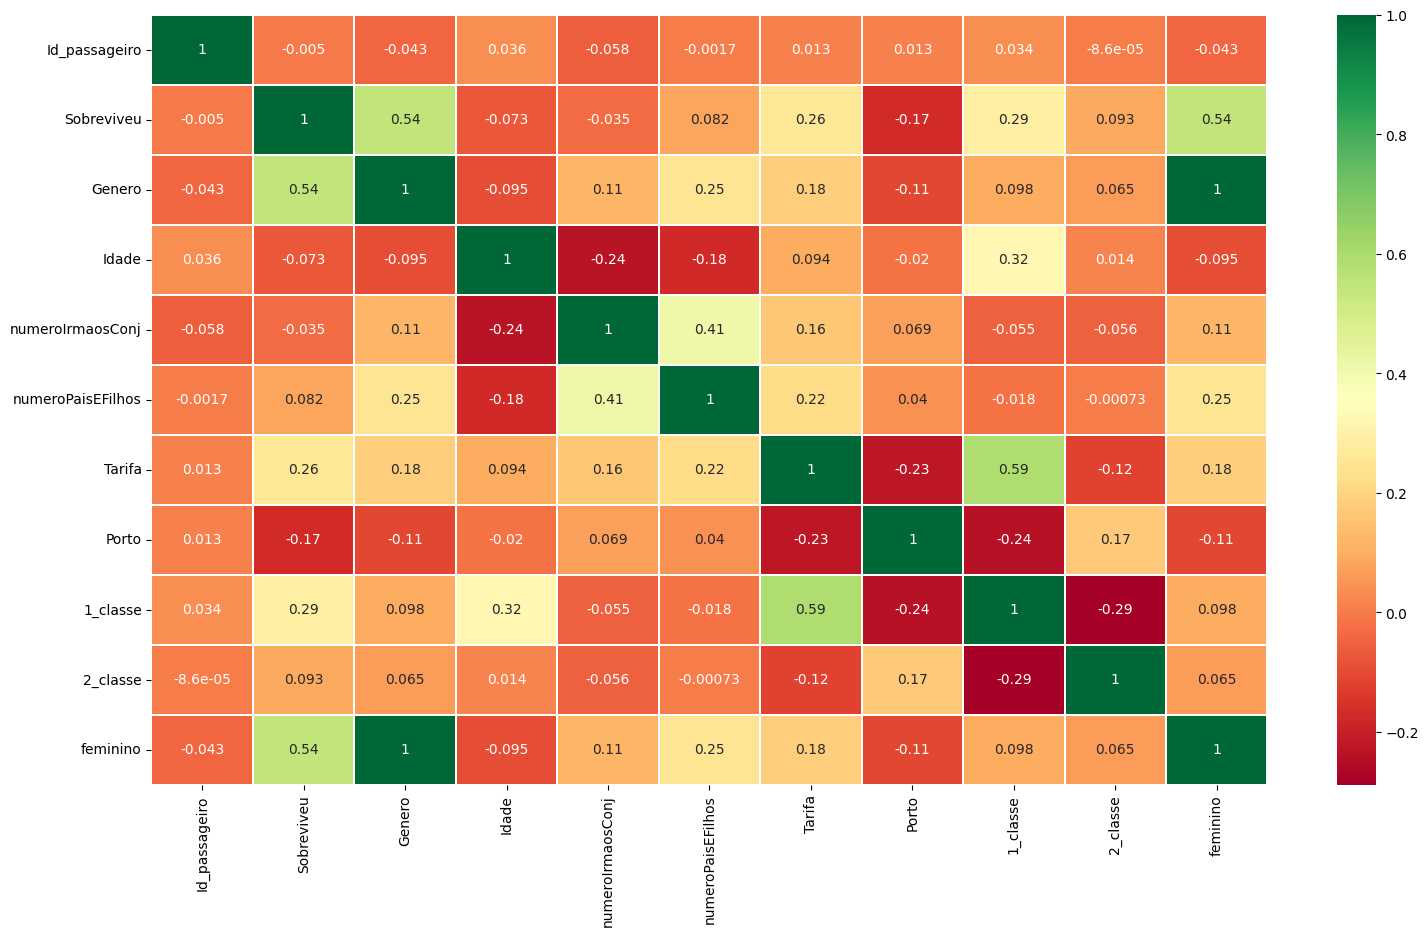

In [16]:
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(18,10)
plt.show()

## **Matriz de Covariância**

---
### Indica a tendência de variáveis se moverem juntas na mesma direção, ou em direções opostas.

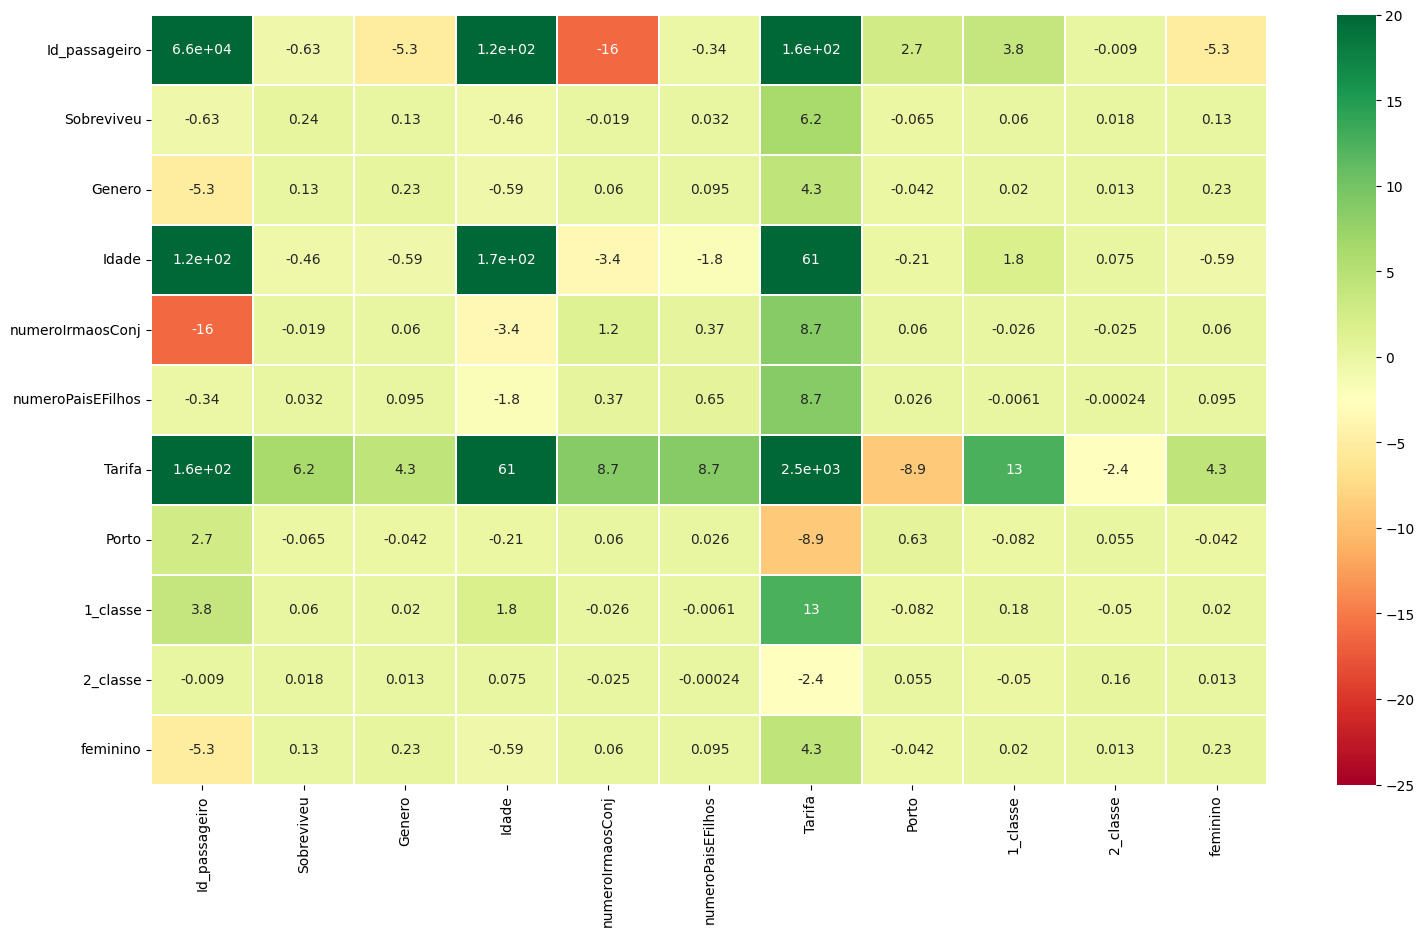

In [18]:
sns.heatmap(df.cov(numeric_only=True),annot=True,cmap='RdYlGn',linewidths=0.2, vmin=-25, vmax=20)
fig=plt.gcf()
fig.set_size_inches(18,10)
plt.show()



> # **Observando a correlação dos dados obtidos**
---

### _Nota histórica_

#### Segundo relatos dos oficiais da tripulação, os dois responsáveis por alocar os passageiros nos botes, o fizeram de formas diferentes. Enquanto um deles alocava primeiramente mulheres e crianças, e posteriormente completava os assentos com homens, o outro alocava apenas as mulheres e crianças, descendo os botes com assentos vagos. Esse fato contribuiu para a discrepância entre homens e mulheres sobreviventes.

#### No processo de evacuação, os passageiros não foram logo informados que o navio estava afundando, então ao pedirem para os passageiros irem ao convés, os passageiros de classes inferiores, que estavam em andares inferiores se recusaram a ir para a parte externa do navio devido ao frio, influenciando também na taxa de sobrevivência.

#### Enquanto os passageiros de classes superiores tiveram instruções e foram auxiliados a vestir os coletes e ocupar os botes, os passageiros dos níveis inferiores foram vagamente instruídos a irem para o convés.

#### Ainda, vale mencionar que de todos os passageiros a bordo do Titanic, haviam cerca de 324 na primeira classe, 284 na segunda classe, 709 na terceira classe e finalmente, 107 crianças a bordo Além disso, do total de passageiros vale mencionar que o número de homens a bordo era quase o dobro do de mulheres, sendo 805 homens e 402 mulheres, outro indicio da relação do gênero com a sobrevivência. Por fim, vale mencionar que ao final, a porcentagem de passageiros sobreviventes foi de cerca de 37%




* ### Podemos observar que a variável **Gênero** apresenta uma correlação de **0,54** com a **Sobrevivência**, o que é considerado uma correlação moderadamente forte. **Isso indica que o gênero é um preditor significativo de sobrevivência**, o que historicamente é apoiado pela prática de "mulheres e crianças primeiro" para os botes salva-vidas, apesar de que não existia lei naval que implicava isso. **De acordo com os registros, 74% das mulheres e 52% das crianças a bordo sobreviveram, em comparação com apenas 20% dos homens.**

-
* ### A **Classe** de passagem tem uma correlação de **-0,34** com a **Sobrevivência**, refletindo que passageiros de classes mais elevadas **(representados numericamente por números menores)** tiveram taxas de sobrevivência maiores**. Essa relação negativa pode parecer contra-intuitiva a princípio, mas é explicada pela numeração inversa das classes de passagens no contexto dos dados. ** Registros indicam que cerca de 62% dos passageiros de primeira classe sobreviveram, em comparação com 41% da segunda classe e 25% da terceira classe.**

-
* ### A variável **Tarifa** está negativamente correlacionada com a **Sobrevivência** em **-0,55**, que é a correlação mais forte observada em relação à sobrevivência nesta matriz. Isso sugere que a tarifa paga é um indicador inverso significativo da sobrevivência, possivelmente devido à associação entre tarifas mais altas e classes de passagem mais baixas (mais elevadas em termos de status). --- **A alta correlação negativa entre tarifa e sobrevivência pode ser explicada pela maior probabilidade de sobrevivência entre aqueles que puderam pagar mais pela sua passagem, refletindo o status socioeconômico mais elevado e, consequentemente, o acesso preferencial aos botes salva-vidas, que estavam localizados próximos às cabines superiores.**

-
> # **Outras análises possíveis de extrair dada matriz, seriam:**
---

1.   ### **A correlação entre Idade e Classe de -0,34** pode implicar que passageiros mais jovens tendiam a estar em classes superiores.
2.   ### **Existe uma correlação positiva de 0,25 entre Gênero e Tarifa**, sugerindo possíveis diferenças nas tarifas pagas entre os gêneros.
3.   ### **A correlação de 0,41 entre Irmãos/Conjuges e Pais/Filhos** indica que passageiros que viajavam com irmãos ou cônjuges também tendiam a viajar com pais ou filhos.



In [19]:
#Exibe as primeiras linhas do DataFrame
df.head()

,Id_passageiro,Sobreviveu,Classe,Nome,Genero,Idade,numeroIrmaosConj,numeroPaisEFilhos,Ticket,Tarifa,Cabine,Porto,1_classe,2_classe,feminino
0,1,0,3nd Class,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,CNI,3.0,0,0,0
1,2,1,1st Class,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,38.0,1,0,PC 17599,71.2833,C85,1.0,1,0,1
2,3,1,3nd Class,"Heikkinen, Miss. Laina",2,26.0,0,0,STON/O2. 3101282,7.9250,CNI,3.0,0,0,1
3,4,1,1st Class,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2,35.0,1,0,113803,53.1000,C123,3.0,1,0,1
4,5,0,3nd Class,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,CNI,3.0,0,0,0


# **Algumas visualizações iniciais:**
---

### **Fez-se algumas visualizações iniciais a fim de compreender melhor os dados com os quais estamos trabalhando e determinar se estão de acordo com os dados históricos pesquisados pelo grupo.**

<ipython-input-20-76b3340f85d3>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barras = sns.barplot(x=porcentagem_sobreviventes_por_classe.index,


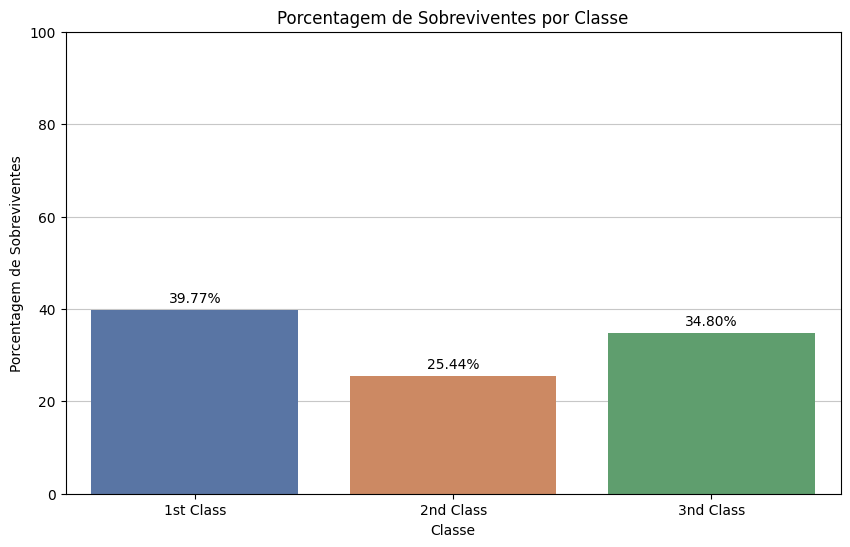

In [20]:
sobreviventes = df[df['Sobreviveu'] == 1]
porcentagem_sobreviventes_por_classe = sobreviventes.groupby('Classe')['Sobreviveu'].count() / sobreviventes.shape[0] * 100

plt.figure(figsize=(10, 6))
barras = sns.barplot(x=porcentagem_sobreviventes_por_classe.index,
                     y=porcentagem_sobreviventes_por_classe.values,
                     palette='deep')

plt.title('Porcentagem de Sobreviventes por Classe')
plt.xlabel('Classe')
plt.ylabel('Porcentagem de Sobreviventes')
plt.ylim(0, 100)
for index, barra in enumerate(barras.patches):
    barras.text(index, barra.get_height() + 1, f'{porcentagem_sobreviventes_por_classe.values[index]:.2f}%', ha='center', va='bottom')

barras.set_axisbelow(True)
plt.grid(axis='y', linestyle='-', alpha=0.7)

plt.show()

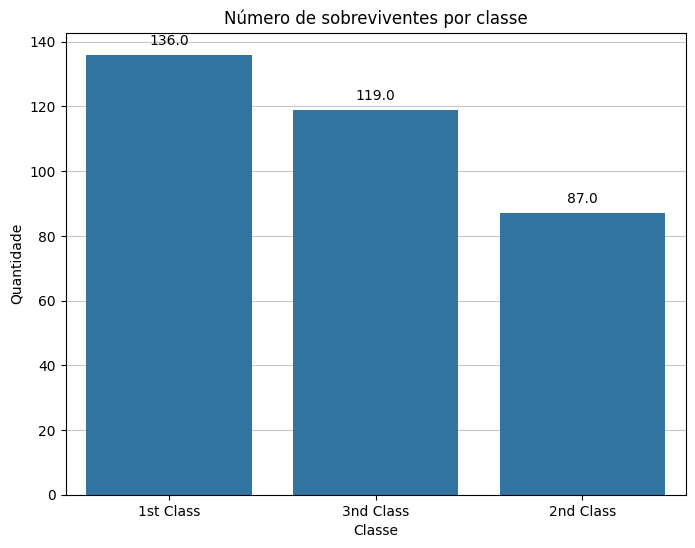

In [21]:
df_sobreviventes = df[df['Sobreviveu'] == 1]

plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Classe', data=df_sobreviventes)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

plt.title('Número de sobreviventes por classe')
plt.xlabel('Classe')
plt.ylabel('Quantidade')
ax.set_axisbelow(True)
plt.grid(axis='y', linestyle='-', alpha=0.7)
plt.show()

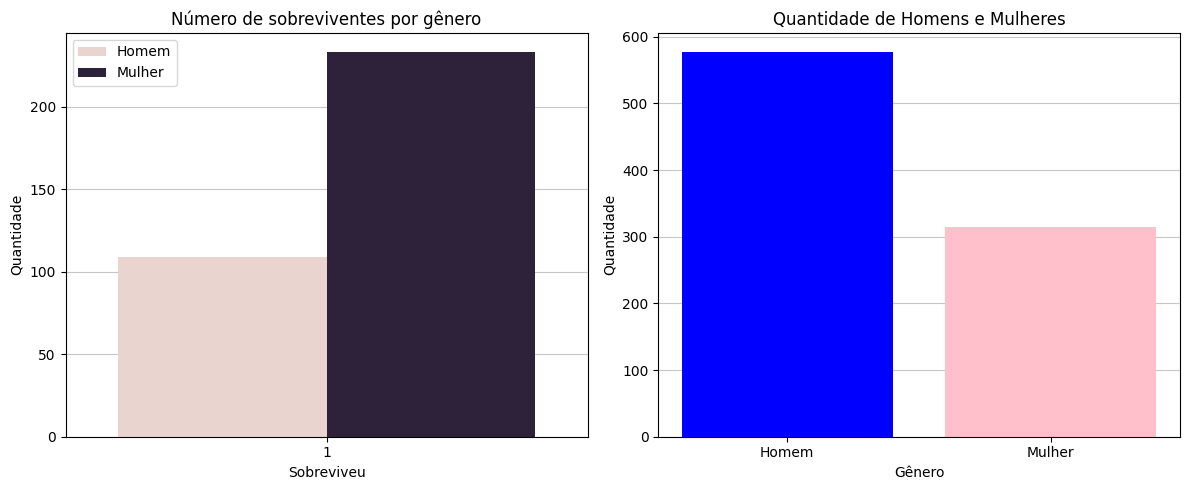

In [22]:
#Cria uma figura com duas subtramas, um gráfico de contagem de sobreviventes por genero,
# e um gráfico de barras mosrando a quantidade por gênero.
df_sobreviventes = df[df['Sobreviveu'] == 1]
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.countplot(x='Sobreviveu', hue='Genero', data=df_sobreviventes)
plt.title('Número de sobreviventes por gênero')
plt.xlabel('Sobreviveu')
plt.ylabel('Quantidade')
plt.legend(['Homem', 'Mulher'])
plt.gca().set_axisbelow(True)
plt.grid(axis='y', linestyle='-', alpha=0.7)

plt.subplot(1, 2, 2)
genero_counts = df['Genero'].map({1: 'Homem', 2: 'Mulher'}).value_counts()
plt.bar(genero_counts.index, genero_counts, color=['blue', 'pink'])
plt.title('Quantidade de Homens e Mulheres')
plt.xlabel('Gênero')
plt.ylabel('Quantidade')
plt.gca().set_axisbelow(True)
plt.grid(axis='y', linestyle='-', alpha=0.7)

plt.tight_layout()
plt.show()


Homem: 1

Mulher: 2

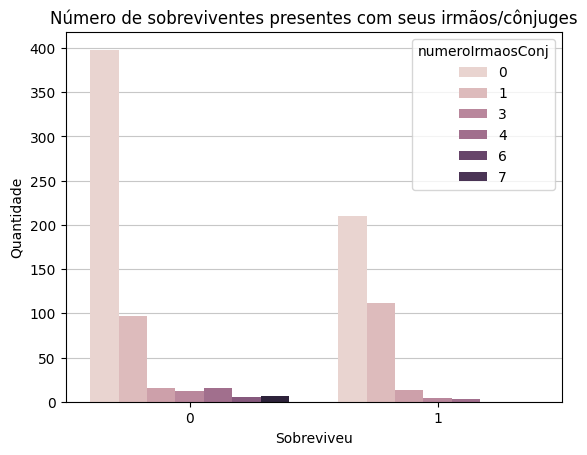

In [23]:
# Gráfico de barras que conta o número de sobreviventes em relação
# ao número de irmãos/cônjuges presentes.
df_sobreviventes = df[df['Sobreviveu'] == 1]
sns.countplot(x=df['Sobreviveu'], hue=df['numeroIrmaosConj'], data=df_sobreviventes)
plt.title('Número de sobreviventes presentes com seus irmãos/cônjuges')
plt.xlabel('Sobreviveu')
plt.ylabel('Quantidade')
plt.gca().set_axisbelow(True)
plt.grid(axis='y', linestyle='-', alpha=0.7)
plt.show()

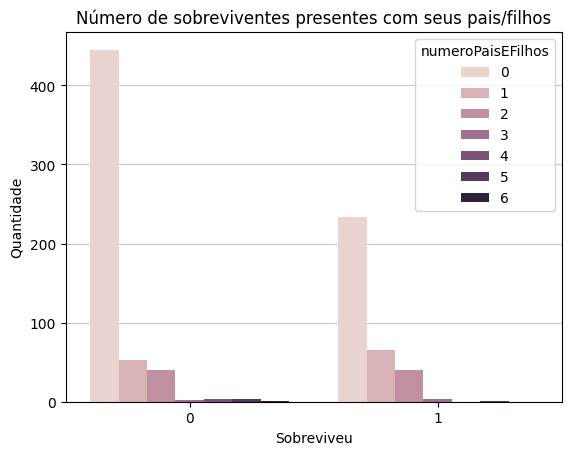

In [24]:
# Gráfico de barras que mostra o número de sobreviventes em relação
# ao número de pais/filhos presentes.
df_sobreviventes = df[df['Sobreviveu'] == 1]
sns.countplot(x=df['Sobreviveu'], hue=df['numeroPaisEFilhos'], data=df_sobreviventes)
plt.title('Número de sobreviventes presentes com seus pais/filhos')
plt.xlabel('Sobreviveu')
plt.ylabel('Quantidade')
plt.gca().set_axisbelow(True)
plt.grid(axis='y', linestyle='-', alpha=0.7)
plt.show()

In [25]:
df['Porto'].value_counts()

3.0    644
1.0    168
2.0     77
Name: Porto, dtype: int64

<ipython-input-26-8de2a9e8f8ea>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sobreviventes['Porto'] = sobreviventes['Porto'].map(mapa_portos)


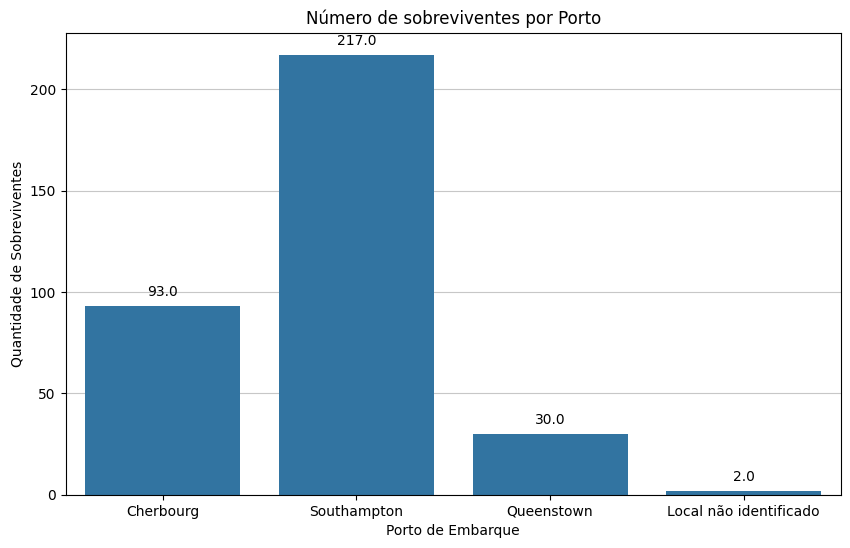

In [26]:
df['Porto'].fillna('LNI', inplace=True)

sobreviventes = df[df['Sobreviveu'] == 1]
mapa_portos = {1: 'Cherbourg', 2: 'Queenstown', 3: 'Southampton', 'LNI': 'Local não identificado'}
sobreviventes['Porto'] = sobreviventes['Porto'].map(mapa_portos)

plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Porto', data=sobreviventes)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

plt.title('Número de sobreviventes por Porto')
plt.xlabel('Porto de Embarque')
plt.ylabel('Quantidade de Sobreviventes')

plt.gca().set_axisbelow(True)
plt.grid(axis='y', linestyle='-', alpha=0.7)

plt.show()

C = Cherbourg: 1

Q = Queenstown: 2

S = Southampton: 3

LNI = Local não identificado

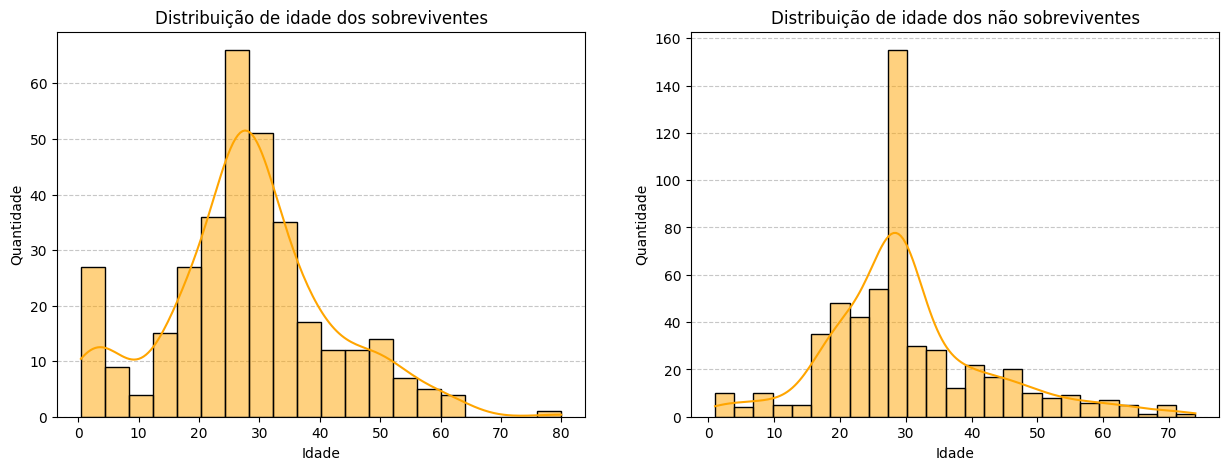

In [27]:
sobreviventes = df[df['Sobreviveu'] == 1]
n_sobreviventes = df[df['Sobreviveu'] == 0]

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(data=sobreviventes, x='Idade', kde=True, color='orange', edgecolor='black', ax=axes[0])
axes[0].set_title('Distribuição de idade dos sobreviventes')
axes[0].set_xlabel('Idade')
axes[0].set_ylabel('Quantidade')

sns.histplot(data=n_sobreviventes, x='Idade', kde=True, color='orange', edgecolor='black', ax=axes[1])
axes[1].set_title('Distribuição de idade dos não sobreviventes')
axes[1].set_xlabel('Idade')
axes[1].set_ylabel('Quantidade')

for ax in axes:
    ax.set_axisbelow(True)
    ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

0    61.616162
1    38.383838
Name: Sobreviveu, dtype: float64


<ipython-input-28-9940b5c624c1>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=porcentagem_sobreviventes.index, y=porcentagem_sobreviventes.values, palette='deep')


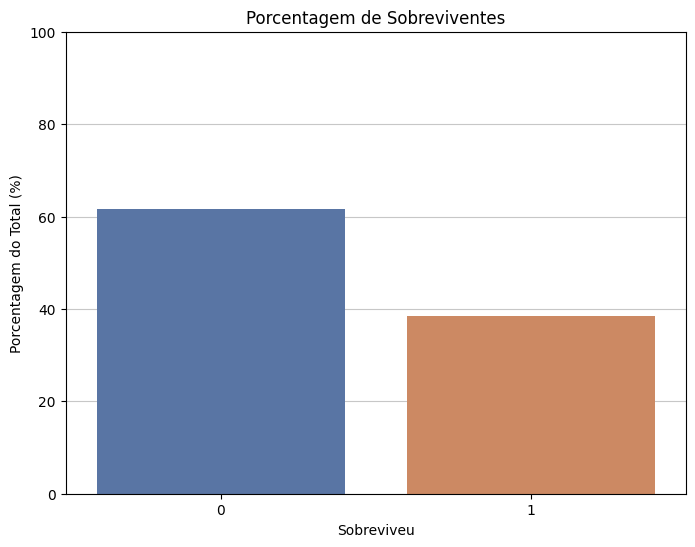

In [28]:
porcentagem_sobreviventes = df['Sobreviveu'].value_counts(normalize=True) * 100

print(porcentagem_sobreviventes)
plt.figure(figsize=(8, 6))
sns.barplot(x=porcentagem_sobreviventes.index, y=porcentagem_sobreviventes.values, palette='deep')
plt.title('Porcentagem de Sobreviventes')
plt.xlabel('Sobreviveu')
plt.ylabel('Porcentagem do Total (%)')
plt.ylim(0, 100)
plt.gca().set_axisbelow(True)
plt.grid(axis='y', linestyle='-', alpha=0.7)
plt.show()

# Visualizações Na Base de Treino

###  1. Um gráfico apresentando o percentual de pessoas embarcadas em cada porto

<ipython-input-29-d562f2f42a9e>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x=pessoas_embarcadas_por_porto.index, y=pessoas_embarcadas_por_porto.values, palette=cor)
<ipython-input-29-d562f2f42a9e>:17: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  barplot = sns.barplot(x=pessoas_embarcadas_por_porto.index, y=pessoas_embarcadas_por_porto.values, palette=cor)
<ipython-input-29-d562f2f42a9e>:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  barplot.set_xticklabels(barplot.get_xticklabels(), rotation=45, ha='right')


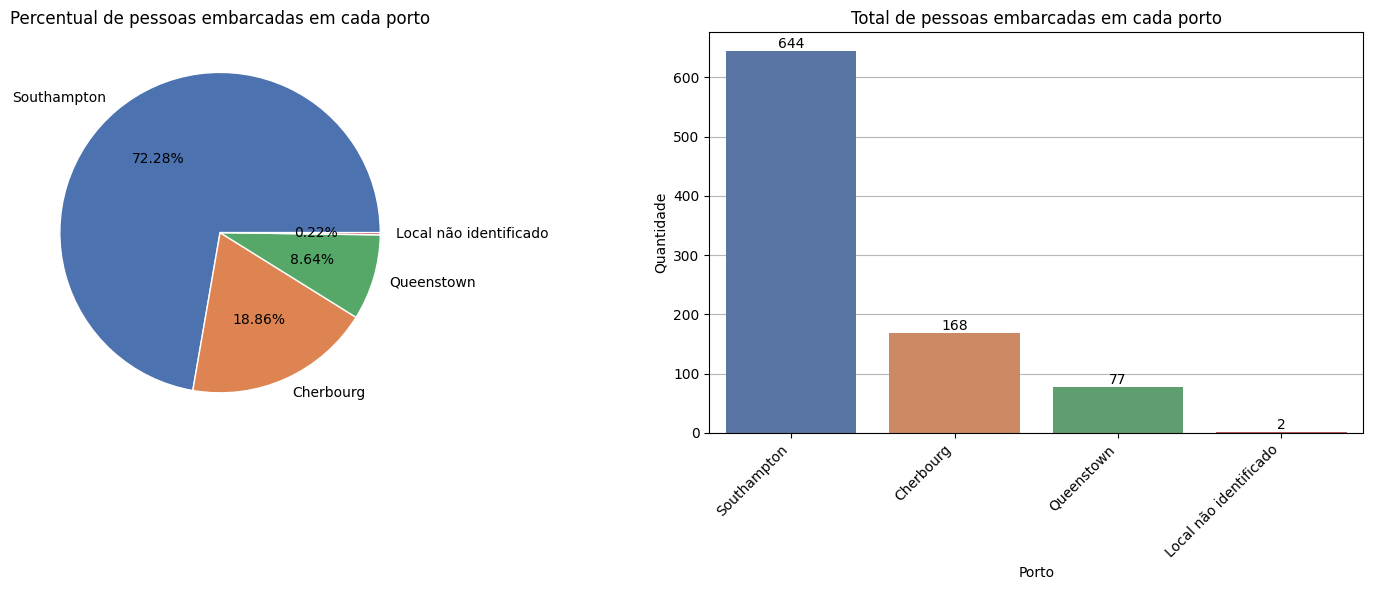

In [29]:
df['Porto'].fillna('LNI', inplace=True)
mapa_portos = {1: 'Cherbourg', 2: 'Queenstown', 3: 'Southampton', 'LNI': 'Local não identificado'}
df_renomeia_porto = df['Porto'].map(mapa_portos)

pessoas_embarcadas_por_porto = df_renomeia_porto.value_counts()

porcentagem = pessoas_embarcadas_por_porto / pessoas_embarcadas_por_porto.sum() * 100
cor = sns.color_palette('deep')

plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.pie(porcentagem, labels=porcentagem.index, autopct='%1.2f%%', colors=cor, wedgeprops={'linewidth': 1, 'edgecolor': 'white'})
plt.title('Percentual de pessoas embarcadas em cada porto')

plt.subplot(1, 2, 2)
barplot = sns.barplot(x=pessoas_embarcadas_por_porto.index, y=pessoas_embarcadas_por_porto.values, palette=cor)
plt.title('Total de pessoas embarcadas em cada porto')
plt.xlabel('Porto')
plt.ylabel('Quantidade')
plt.gca().set_axisbelow(True)
plt.grid(axis='y', linestyle='-', alpha=0.9)

for index, value in enumerate(pessoas_embarcadas_por_porto):
    plt.text(index, value, str(value), ha='center', va='bottom')

barplot.set_xticklabels(barplot.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

###  2. Um gráfico apresentando o percentual e o número de pessoas no navio por classe


<ipython-input-30-02b634a4ec73>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pessoas_por_classe.index, y=pessoas_por_classe.values, palette=cor)
<ipython-input-30-02b634a4ec73>:13: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.barplot(x=pessoas_por_classe.index, y=pessoas_por_classe.values, palette=cor)


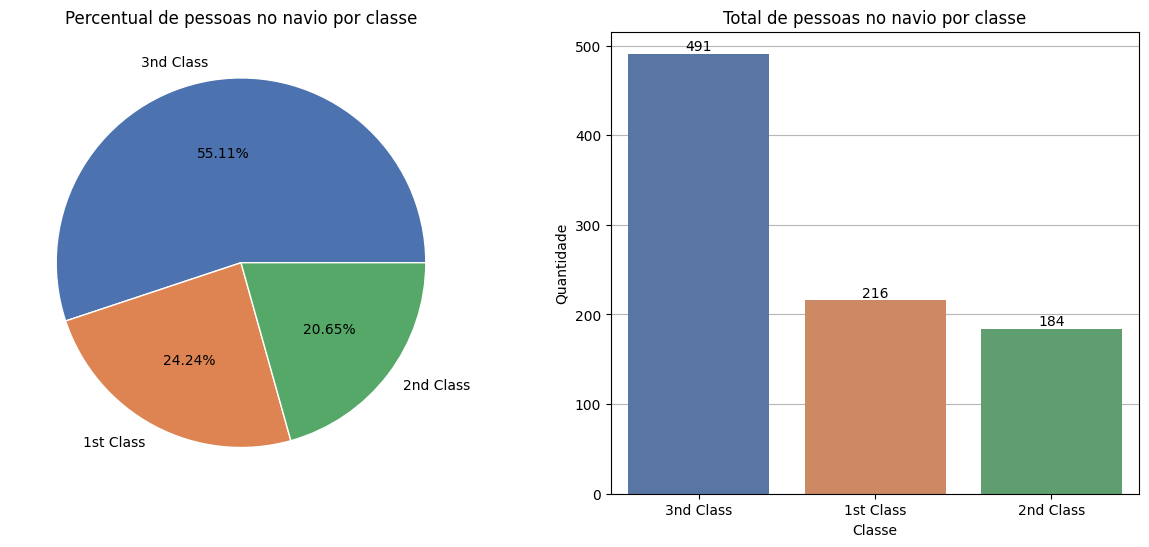

In [30]:
df_renamed_class = df['Classe']
pessoas_por_classe = df_renamed_class.value_counts()

porcentagens = pessoas_por_classe / pessoas_por_classe.sum() * 100
cor = sns.color_palette('deep')
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.pie(porcentagens, labels=porcentagens.index, autopct='%1.2f%%', colors=cor, wedgeprops={'linewidth': 1, 'edgecolor': 'white'})
plt.title('Percentual de pessoas no navio por classe')

plt.subplot(1, 2, 2)
sns.barplot(x=pessoas_por_classe.index, y=pessoas_por_classe.values, palette=cor)
plt.title('Total de pessoas no navio por classe')
plt.xlabel('Classe')
plt.ylabel('Quantidade')
plt.gca().set_axisbelow(True)
plt.grid(axis='y', linestyle='-', alpha=0.9)

for index, value in enumerate(pessoas_por_classe):
    plt.text(index, value, str(value), ha='center', va='bottom')


plt.show()

###  3. Um gráfico apresentando o número de irmãos e cônjuges a bordo do Navio


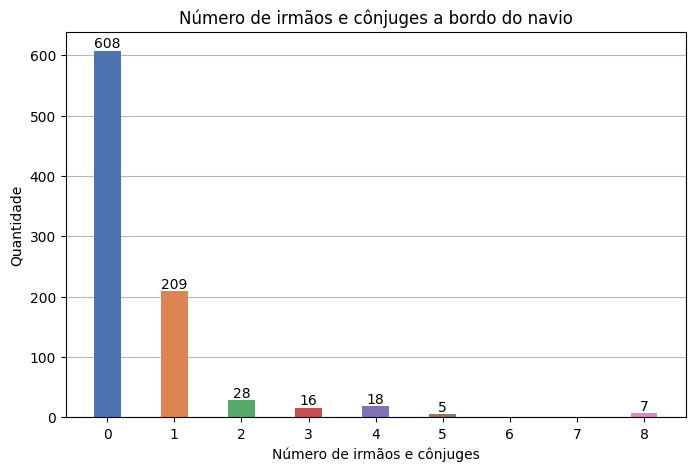

In [31]:
aux = df['numeroIrmaosConj'].value_counts().sort_index()

plt.figure(figsize=(8, 5))

bars = plt.bar(aux.index, aux.values, width=0.4,  label='Número de irmãos e cônjuges', color=sns.color_palette('deep'))
plt.xticks(range(min(aux.index), max(aux.index)+1, 1))
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, height, ha='center', va='bottom')

plt.xlabel('Número de irmãos e cônjuges')
plt.ylabel('Quantidade')
plt.title('Número de irmãos e cônjuges a bordo do navio')
plt.gca().set_axisbelow(True)
plt.grid(axis='y', linestyle='-', alpha=0.9)

plt.show()

###  4. Um gráfico apresentando o número de pais / filhos a bordo do Navio


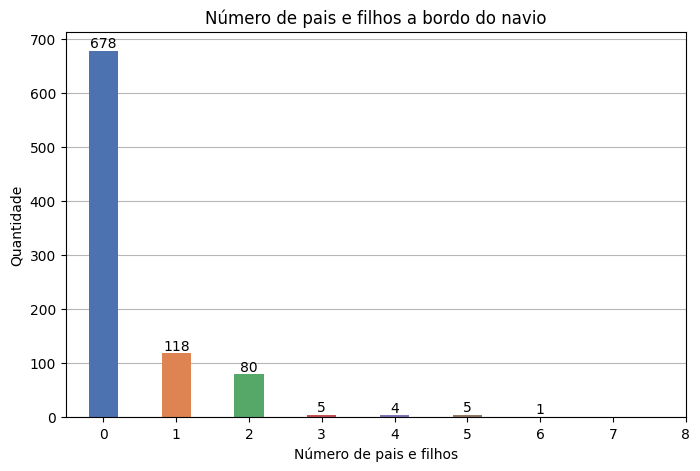

In [32]:
aux2 = df['numeroPaisEFilhos'].value_counts().sort_index()

plt.figure(figsize=(8, 5))

bars = plt.bar(aux2.index, aux2.values, width=0.4, label='Número de pais e filhos', color=sns.color_palette('deep'))
plt.xticks(range(min(aux.index), max(aux.index)+1, 1))
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, height, ha='center', va='bottom')
plt.xlabel('Número de pais e filhos')
plt.ylabel('Quantidade')
plt.title('Número de pais e filhos a bordo do navio')
plt.gca().set_axisbelow(True)
plt.grid(axis='y', linestyle='-', alpha=0.9)

plt.show()

###  5. Um gráfico apresentando o número de passageiros por idade em conjunto com a média por idade



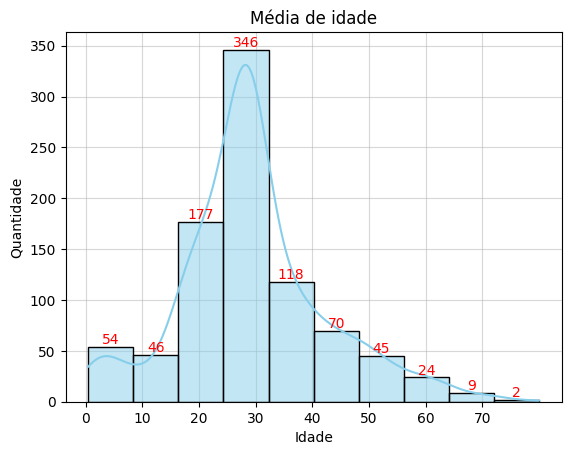

In [33]:
ax = sns.histplot(data = df, x = df.Idade, bins=10, kde=True, label='Idade',color = 'skyblue')
plt.xlabel('Idade')
plt.ylabel('Quantidade')
plt.title('Média de idade')
ax.bar_label(ax.containers[0], label_type='edge', color ='red')
plt.xticks(list(range(0, 80, 10)), labels=list(range(0, 80, 10)))
ax.set_axisbelow(True)
plt.grid(axis='y', linestyle='-', alpha=0.5)
plt.grid(axis='x', linestyle='-', alpha=0.5)
plt.show()

###  6. Um gráfico apresentando o número de passageiros e percentual dos que sobreviveram ou não. E, outro com o número dos que sobreviveriam ou morreriam baseado nas sugestões que vocês encontraram!

<ipython-input-34-2ba30b192d61>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  countplot = sns.countplot(x='Sobreviveu', data=df, palette={'0': 'orange', '1': 'blue'})


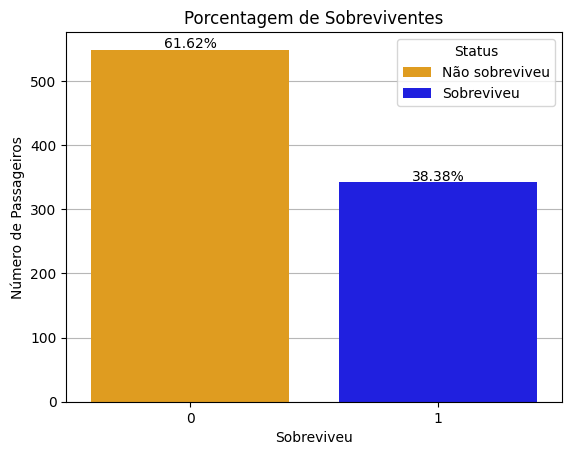

In [34]:
countplot = sns.countplot(x='Sobreviveu', data=df, palette={'0': 'orange', '1': 'blue'})
total = float(len(df))
for p in countplot.patches:
    height = p.get_height()
    countplot.text(p.get_x() + p.get_width() / 2.,
                   height + 3,
                   '{:.2f}%'.format((height / total) * 100),
                   ha="center")

plt.legend(labels=['Não sobreviveu', 'Sobreviveu'], title='Status')
plt.ylabel('Número de Passageiros')
plt.gca().set_axisbelow(True)
plt.grid(axis='y', linestyle='-', alpha=0.9)
plt.title('Porcentagem de Sobreviventes')
plt.show()

# Treinamento e Validação: Modelo para classificação de sobrevivente/não sobrevivente

### Regressão Logística: aplicação do modelo

A **regressão logística** é um dos algoritmos supervisionados de classificação mais conhecidos no mundo da ciência de dados. Isso porque, é um modelo simples e de fácil entendimento para os iniciantes no ramo sem perder a capacidade de gerar bons resultados. Por mais que hoje em dia haja diversas implementações prontas deste modelo, tais como o implementado pelo scikit-learn, é bom lembrar que estes algoritmos são nada mais que modelos matemáticos que podem ser implementados manualmente.

Como o próprio nome sugere, o algoritmo da regressão logística é uma variação do algoritmos usado para a regressão linear. Entretanto, para problemas de classificação utilizar como resposta uma equação exata e linear para decidir a linha de decisão entre uma classe e outra pode oferecer problemas visto que, por exemplo, a existência de outliers pode prejudicar o modelo. Sendo assim, usamos para realizar esta decisão o cálculo da probabilidade, entre 0 e 1, associada ao valor calculado a fim de saber a melhor classificação para o valor oferecido como entrada. Essa função é conhecida como função de ativação e a que é usada no modelo é a sigmoid.

A função sigmoid dada por: $h_\theta(x) = \frac{1}{1 + e ^ {x}}$
Onde x é a fórmula obtida pelo processo de regressão linear

Sendo assim, é possível transformar os resultados da regressão linear em uma curva que se ajuste melhor aos dados e possa fornecer previsões mais certeiras por meio do calculo de probabilidades associado a cada valor. Entretanto, isso é para os valores calculados pela equação descoberta pelo modelo.

Função linear: $g(x) = -1.33  + 2.55 \cdot {i_{Feminino}} +1.27 \cdot i_{2Classe} + 2.58\cdot i_{1Classe} - 0.04\cdot i_{Idade}$

In [35]:
def accuracy(y_pred, y_test):
  return np.sum(y_pred==y_test)/len(y_test)

In [36]:
class LogisticRegression:

    def __init__(self):
        self.weights = [2.55, 1.27, 2.58, -0.04]
        self.bias = -1.33

    def sigmoid(self, g):
        return 1 / (1 + np.exp(-g))

    def predict(self, X):
        linear_predictions = np.dot(X, self.weights) + self.bias
        y_pred = self.sigmoid(linear_predictions)
        class_pred = [0 if y < 0.5 else 1 for y in y_pred]
        return class_pred

    def shows_weights_bias(self):
      print("==============================================")
      print("Valores corespondentes aos pesos das classes analisadas")
      for idx, value in enumerate(self.weights):
        print(f"Para o valor correspondente ao atributo {idx+1} temos o peso de: {value:.5f}")
      print("Valor do bias para a equação obtida")
      print(self.bias)
      print("==============================================")



In [37]:
def plot_confusion_matrix(y_true, y_pred, labels):
    confusion_matrix = pd.crosstab(y_true, y_pred, rownames=['True'], colnames=['Predicted'])
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_matrix, annot=True, cmap='Blues', cbar=False, xticklabels=labels, yticklabels=labels)
    plt.title('Matriz de Confusão')
    plt.xlabel('Previsto')
    plt.ylabel('Verdadeiro')
    plt.show()

In [38]:
y = df['Sobreviveu'].values
X = df[['feminino', '2_classe', '1_classe', 'Idade']].values

### Sobre matriz de confusão e acurácia

A matriz de confusão é uma ferramenta utilizada em problemas de classificação para avaliar o desempenho de um modelo. Ela permite visualizar a performance do modelo ao comparar as previsões feitas pelo modelo com os valores reais dos dados.

A matriz de confusão é uma tabela que organiza as previsões do modelo em quatro diferentes categorias:

1. **Verdadeiro Positivo (VP)**: São os casos em que o modelo previu corretamente a classe positiva (ou de interesse) quando a classe real também era positiva.

2. **Falso Positivo (FP)**: Estes são os casos em que o modelo previu incorretamente a classe positiva, quando na verdade a classe real era negativa.

3. **Verdadeiro Negativo (VN)**: Representam os casos em que o modelo previu corretamente a classe negativa quando a classe real também era negativa.

4. **Falso Negativo (FN)**: São os casos em que o modelo previu incorretamente a classe negativa, quando na verdade a classe real era positiva.




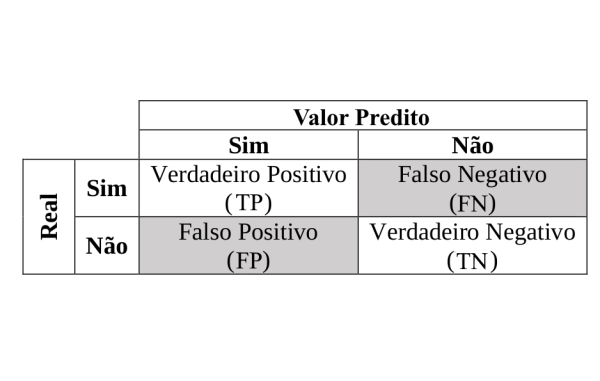


A partir dessas categorias, podemos calcular várias métricas de avaliação do modelo, como:

- **Acurácia**: É a proporção total de previsões corretas do modelo, ou seja, a soma dos verdadeiros positivos e verdadeiros negativos dividida pelo total de amostras. A acurácia é uma métrica geralmente utilizada, mas pode ser enganosa quando as classes são desbalanceadas, ou seja, quando uma classe é muito mais frequente do que a outra.


A acurácia é uma métrica útil para entender o desempenho geral do modelo, mas pode não ser suficiente em situações onde é necessário avaliar o desempenho em cada classe de forma mais detalhada. É aí que as outras métricas derivadas da matriz de confusão, como precisão, recall, e F1-score, podem ser mais úteis.

$Accuracy = \frac{VP + VN}{VP + FP + VN + FN}$

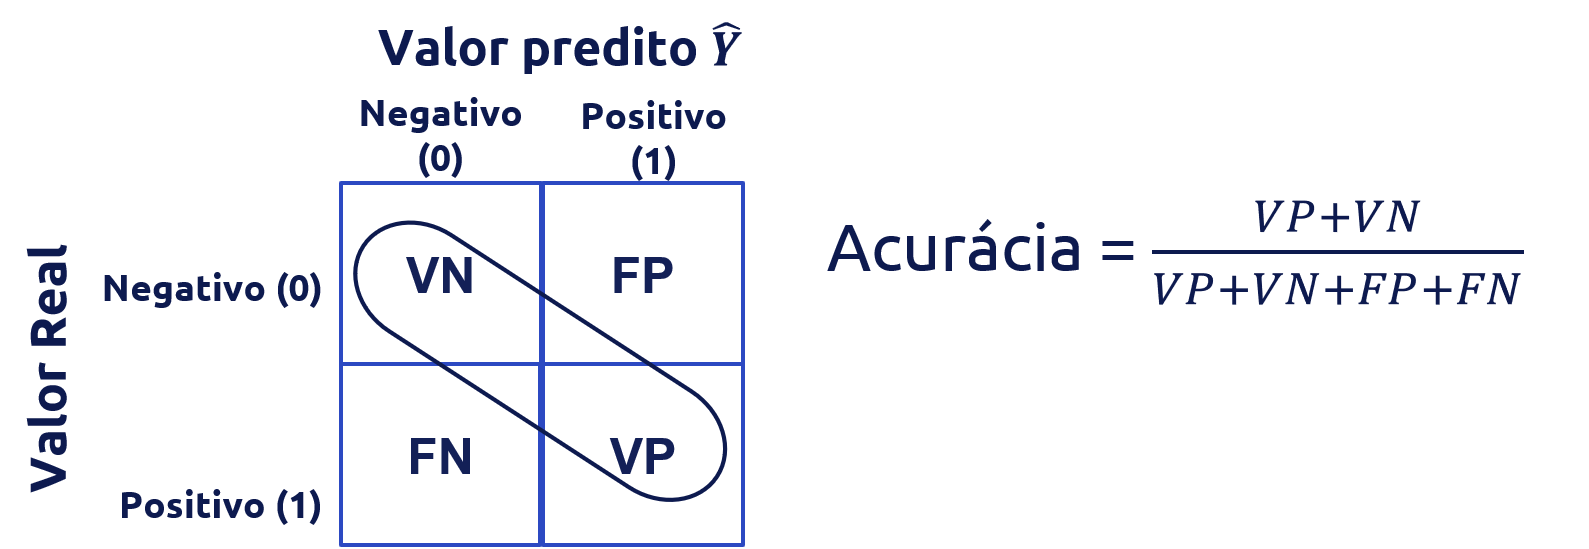

Acurácia do modelo: 0.7822671156004489


Valores corespondentes aos pesos das classes analisadas
Para o valor correspondente ao atributo 1 temos o peso de: 2.55000
Para o valor correspondente ao atributo 2 temos o peso de: 1.27000
Para o valor correspondente ao atributo 3 temos o peso de: 2.58000
Para o valor correspondente ao atributo 4 temos o peso de: -0.04000
Valor do bias para a equação obtida
-1.33
None


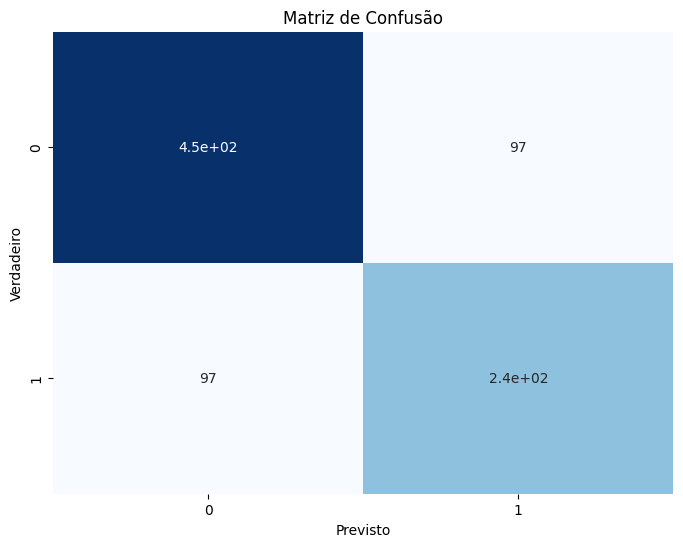

In [68]:
classifier = LogisticRegression()
y_pred = classifier.predict(X)
print(f'Acurácia do modelo: {accuracy(y_pred, y)}\n\n')
print(classifier.shows_weights_bias())

labels = np.unique(y)
plot_confusion_matrix(y, y_pred, labels)

## Base de Teste

In [49]:
# Leitura dos dados no formato CSV
df_test = pd.read_csv('/content/drive/MyDrive/Leega_case_final/test.csv')

In [50]:
# Exibe as primeiras linhas do dataframe
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [51]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [52]:
# Renomeia as colunas do dataframe
df_test.rename(columns={'PassengerId':'Id_passageiro', 'Pclass':'Classe',
                   'Name':'Nome', 'Sex':'Genero',
                   'Age':'Idade', 'SibSp':'numeroIrmaosConj', 'Parch':'numeroPaisEFilhos',
                   'Ticket':'Ticket', 'Fare':'Tarifa', 'Cabin':'Cabine',
                   'Embarked':'Porto'},inplace=True)

In [53]:
df_test['Tarifa'].fillna('TNI', inplace=True) # Tarifa não identificada
df_test['Cabine'].fillna('LNI', inplace=True)

# Calcula os valores da mediana das idades para cada gênero
md_idade_male = df_test[df_test['Genero'] == 'male']['Idade'].median()
md_idade_female = df_test[df_test['Genero'] == 'female']['Idade'].median()

# Arredonda as medianas com duas casas decimais de precisão
md_idade_male = round(md_idade_male, 2)
md_idade_female = round(md_idade_female, 2)

print(f"Mediana idade Homem: {md_idade_male}\nMediana idade mulher: {md_idade_female}")

df_test.loc[df_test['Genero'] == 'male', 'Idade'] = df_test.loc[df_test['Genero'] == 'male', 'Idade'].fillna(md_idade_male)
df_test.loc[df_test['Genero'] == 'female', 'Idade'] = df_test.loc[df_test['Genero'] == 'female', 'Idade'].fillna(md_idade_female)

Mediana idade Homem: 27.0
Mediana idade mulher: 27.0


In [54]:
# Mapeia os valores das colunas 'Porto' e 'Genero' do dataframe 'df_test' para novos
# valores de acordo com os dicionários 'mapa_portos' e 'mapa_sexo', respectivamente.

mapa_portos = {'C': 1, 'Q': 2, 'S': 3}
mapa_sexo = {'male': 1, 'female': 2}
df_test['Porto'] = df_test['Porto'].map(mapa_portos)
df_test['Genero'] = df_test['Genero'].map(mapa_sexo)

df_test['1_classe'] = (df_test['Classe'] == 1).astype(int)
df_test['2_classe'] = (df_test['Classe'] == '1st Class').astype(int)
df_test['feminino'] = (df_test['Genero'] == '2nd Class').astype(int)
df_test.head()

,Id_passageiro,Classe,Nome,Genero,Idade,numeroIrmaosConj,numeroPaisEFilhos,Ticket,Tarifa,Cabine,Porto,1_classe,2_classe,feminino
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,LNI,2,0,0,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",2,47.0,1,0,363272,7.0,LNI,3,0,0,0
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,LNI,2,0,0,0
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,LNI,3,0,0,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",2,22.0,1,1,3101298,12.2875,LNI,3,0,0,0


In [55]:
# Exibe a primeira linha do dataframe após os tratamentos
df_test.head()

,Id_passageiro,Classe,Nome,Genero,Idade,numeroIrmaosConj,numeroPaisEFilhos,Ticket,Tarifa,Cabine,Porto,1_classe,2_classe,feminino
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,LNI,2,0,0,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",2,47.0,1,0,363272,7.0,LNI,3,0,0,0
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,LNI,2,0,0,0
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,LNI,3,0,0,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",2,22.0,1,1,3101298,12.2875,LNI,3,0,0,0


In [56]:
base_test_x = df_test[['feminino', '2_classe', '1_classe', 'Idade']].values
y_pred_test = classifier.predict(base_test_x)

In [57]:
df_test['Sobreviveu'] = y_pred_test
df_test.head()

,Id_passageiro,Classe,Nome,Genero,Idade,numeroIrmaosConj,numeroPaisEFilhos,Ticket,Tarifa,Cabine,Porto,1_classe,2_classe,feminino,Sobreviveu
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,LNI,2,0,0,0,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",2,47.0,1,0,363272,7.0,LNI,3,0,0,0,0
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,LNI,2,0,0,0,0
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,LNI,3,0,0,0,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",2,22.0,1,1,3101298,12.2875,LNI,3,0,0,0,0


In [58]:
mapa_sexo_teste = {1: 'male', 2: 'female'}
mapa_classes = {1: '1st Class', 2: '2nd Class', 3: '3nd Class'}
df_test['Genero'] = df_test['Genero'].map(mapa_sexo_teste)
df_test['Classe'] = df_test['Classe'].map(mapa_classes)

Classe
1st Class    36.448598
2nd Class     0.000000
3nd Class     0.000000
Name: Sobreviveu, dtype: float64


<ipython-input-59-34476e02e11d>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=porcentagem_sobreviventes_por_classe_test.index, y=porcentagem_sobreviventes_por_classe_test.values, palette='deep')


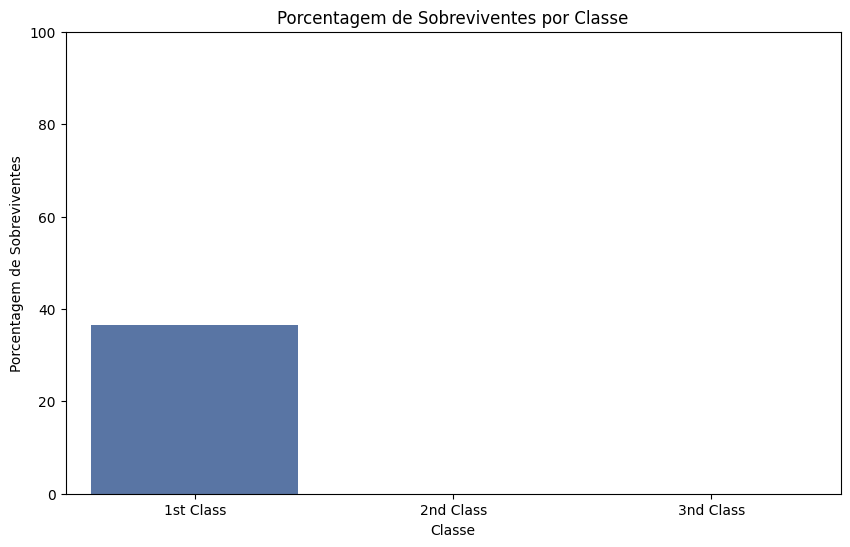

In [59]:
porcentagem_sobreviventes_por_classe_test = df_test.groupby('Classe')['Sobreviveu'].mean() * 100

print(porcentagem_sobreviventes_por_classe_test)
plt.figure(figsize=(10, 6))
sns.barplot(x=porcentagem_sobreviventes_por_classe_test.index, y=porcentagem_sobreviventes_por_classe_test.values, palette='deep')
plt.title('Porcentagem de Sobreviventes por Classe')
plt.xlabel('Classe')
plt.ylabel('Porcentagem de Sobreviventes')
plt.ylim(0, 100)
plt.show()

In [60]:
mapa_sobrevive = {0: 'Não Sobreviveu', 1: 'Sobreviveu'}
df_test['Sobreviveu'] = df_test['Sobreviveu'].map(mapa_sobrevive)

Não Sobreviveu    90.669856
Sobreviveu         9.330144
Name: Sobreviveu, dtype: float64


<ipython-input-61-ad3a1a42588c>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=porcentagem_sobreviventes_test.index, y=porcentagem_sobreviventes_test.values, palette='deep')


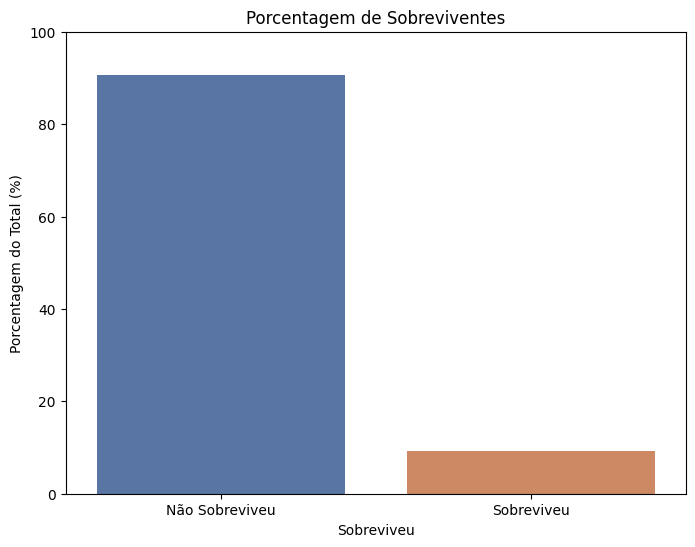

In [61]:
porcentagem_sobreviventes_test = df_test['Sobreviveu'].value_counts(normalize=True) * 100

print(porcentagem_sobreviventes_test)
plt.figure(figsize=(8, 6))
sns.barplot(x=porcentagem_sobreviventes_test.index, y=porcentagem_sobreviventes_test.values, palette='deep')
plt.title('Porcentagem de Sobreviventes')
plt.xlabel('Sobreviveu')
plt.ylabel('Porcentagem do Total (%)')
plt.ylim(0, 100)
plt.show()

In [62]:
df_test.head()

,Id_passageiro,Classe,Nome,Genero,Idade,numeroIrmaosConj,numeroPaisEFilhos,Ticket,Tarifa,Cabine,Porto,1_classe,2_classe,feminino,Sobreviveu
0,892,3nd Class,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,LNI,2,0,0,0,Não Sobreviveu
1,893,3nd Class,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0,LNI,3,0,0,0,Não Sobreviveu
2,894,2nd Class,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,LNI,2,0,0,0,Não Sobreviveu
3,895,3nd Class,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,LNI,3,0,0,0,Não Sobreviveu
4,896,3nd Class,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,LNI,3,0,0,0,Não Sobreviveu


###  7. Um gráfico apresentando o número de passageiros e percentual dos que sobreviveram ou não. E, outro com o número dos que sobreviveriam ou morreriam baseado nas sugestões que vocês encontraram!

Text(0.5, 1.0, 'Sobreviventes vs não sobreviventes por classe de passageiro')

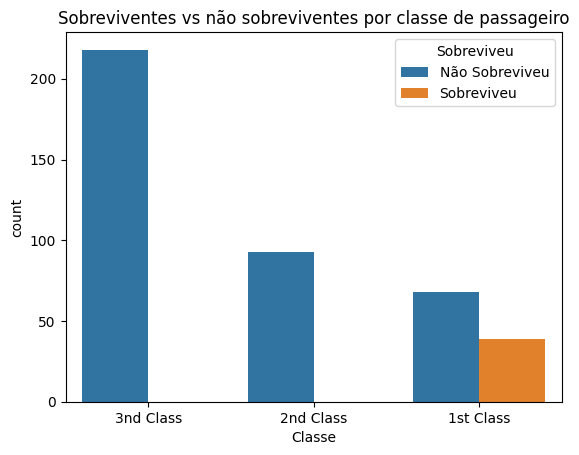

In [63]:
sns.countplot(x='Classe', data=df_test, hue='Sobreviveu')
plt.title('Sobreviventes vs não sobreviventes por classe de passageiro')

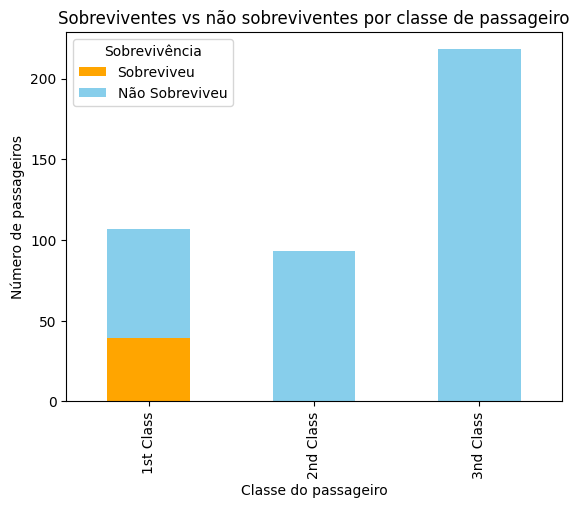

In [64]:
counts = df_test.groupby(['Classe', 'Sobreviveu']).size().unstack()
counts = counts[['Sobreviveu', 'Não Sobreviveu']]

counts.plot(kind='bar', stacked=True, color=['orange', 'skyblue'])
plt.title('Sobreviventes vs não sobreviventes por classe de passageiro')
plt.xlabel('Classe do passageiro')
plt.ylabel('Número de passageiros')
plt.legend(title='Sobrevivência')
plt.show()

### 8. Dois gráficos; o primeiro deles apresentando o número de passageiros e percentual que sobreviveram ou não por sexo. E, outro com o número dos que sobreviveriam ou morreriam baseado nas sugestões que vocês encontraram!

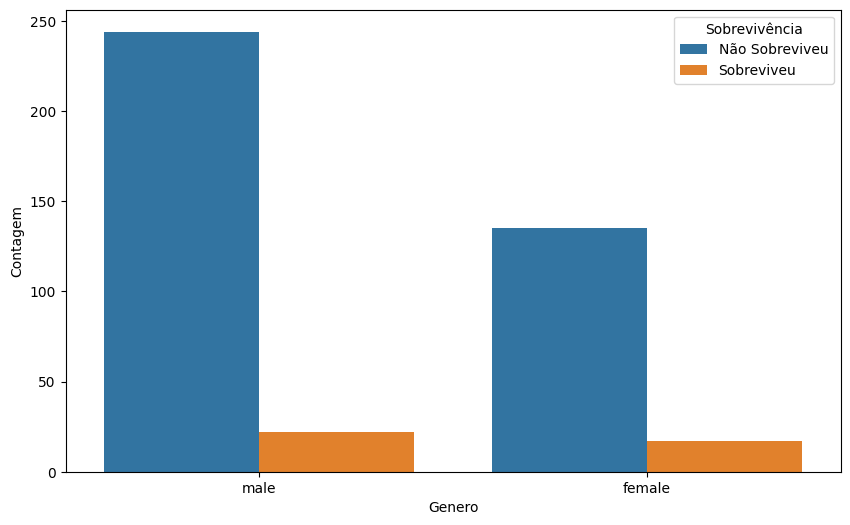

In [65]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Genero', hue='Sobreviveu', data=df_test)
plt.xlabel('Genero')
plt.ylabel('Contagem')
plt.legend(title='Sobrevivência')
plt.show()

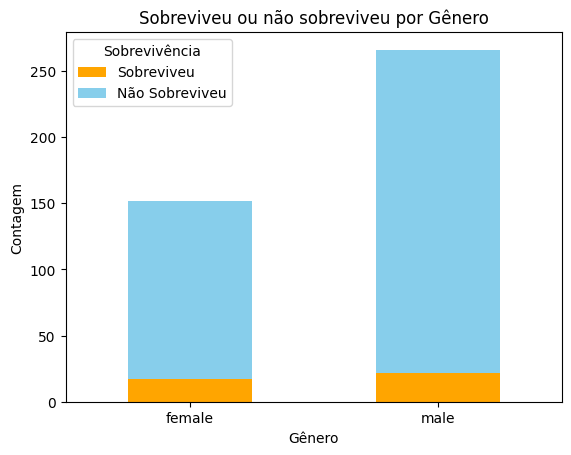

In [66]:
pivot_df = df_test.pivot_table(index='Genero', columns='Sobreviveu', aggfunc='size', fill_value=0)

pivot_df = pivot_df[['Sobreviveu', 'Não Sobreviveu']]

pivot_df.plot(kind='bar', stacked=True, color=['orange', 'skyblue'])
plt.title('Sobreviveu ou não sobreviveu por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Contagem')
plt.legend(title='Sobrevivência')
plt.xticks(rotation=0)
plt.show()

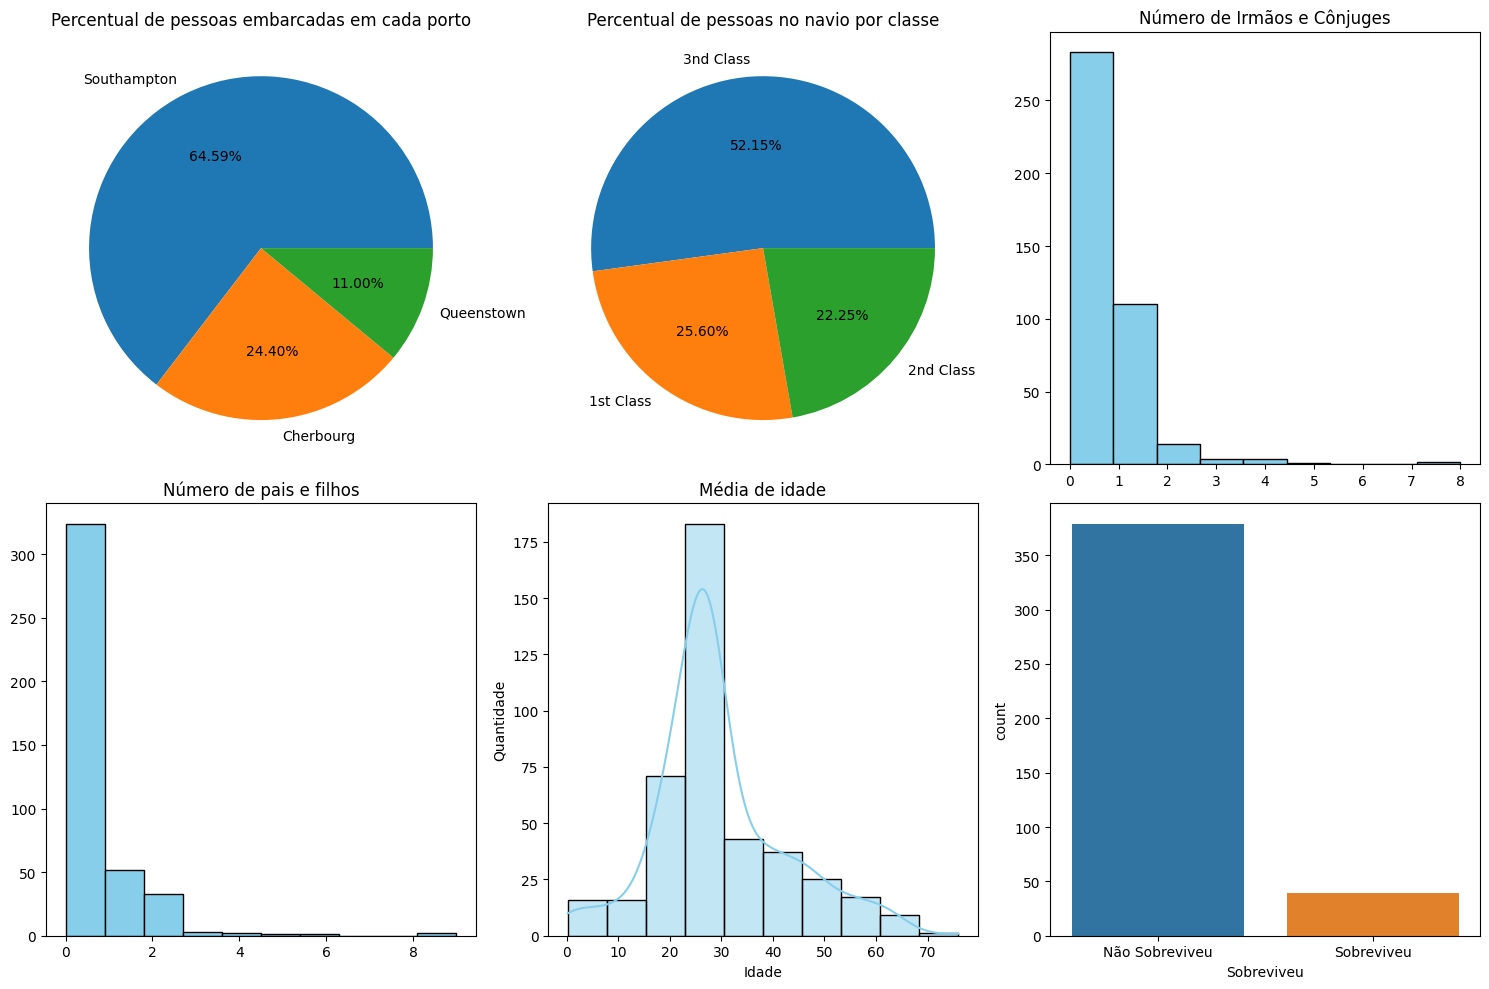

In [67]:
mapa_portos = {1: 'Cherbourg', 2: 'Queenstown', 3: 'Southampton', 'LNI': 'Local não identificado'}
df_test_renomeia_porto = df_test['Porto'].map(mapa_portos)
pessoas_embarcadas_por_porto = df_test_renomeia_porto.value_counts()
porcentagem = pessoas_embarcadas_por_porto / pessoas_embarcadas_por_porto.sum() * 100

# Subplot 1
plt.figure(figsize=(15, 10))
plt.subplot(2, 3, 1)
plt.pie(porcentagem, labels=porcentagem.index, autopct='%1.2f%%')
plt.title('Percentual de pessoas embarcadas em cada porto')

# Definição da renomeação das classes
df_test_renamed_class = df_test['Classe']
pessoas_por_classe = df_test_renamed_class.value_counts()
percentagens = pessoas_por_classe / pessoas_por_classe.sum() * 100

# Subplot 2
plt.subplot(2, 3, 2)
plt.pie(percentagens, labels=percentagens.index, autopct='%1.2f%%')
plt.title('Percentual de pessoas no navio por classe')

# Subplot 3
plt.subplot(2, 3, 3)
sibling_and_spouse = df_test['numeroIrmaosConj']
n_bins = sibling_and_spouse.max() + 1
plt.hist(sibling_and_spouse, bins=n_bins, color='skyblue', edgecolor='black')
plt.title('Número de Irmãos e Cônjuges')

# Subplot 4
plt.subplot(2, 3, 4)
parent_children = df_test['numeroPaisEFilhos']
n_bins = parent_children.max() + 1
plt.hist(parent_children, bins=n_bins, color='skyblue', edgecolor='black')
plt.title('Número de pais e filhos')

# Subplot 5
plt.subplot(2, 3, 5)
sns.histplot(data=df_test, x=df_test.Idade, bins=10, kde=True, label='Idade', color='skyblue')
plt.xlabel('Idade')
plt.ylabel('Quantidade')
plt.title('Média de idade')

# Subplot 6
plt.subplot(2, 3, 6)
sns.countplot(x='Sobreviveu', data=df_test, hue='Sobreviveu')

plt.tight_layout()
plt.show()

In [71]:
!git init

hint: Using 'master' as the name for the initial branch. This default branch name
hint: is subject to change. To configure the initial branch name to use in all
hint: of your new repositories, which will suppress this warning, call:
hint: 
hint: 	git config --global init.defaultBranch <name>
hint: 
hint: Names commonly chosen instead of 'master' are 'main', 'trunk' and
hint: 'development'. The just-created branch can be renamed via this command:
hint: 
hint: 	git branch -m <name>
Initialized empty Git repository in /content/.git/


In [75]:
!git clone https://github.com/vpsilvaa/python.git

fatal: destination path 'python' already exists and is not an empty directory.
